In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import featuretools as ft

In [2]:
train = pd.read_csv('../input/forest-cover-type-prediction/train.csv')
train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [3]:
# drop ID column
X_train = train.iloc[:,1:]

## Feature Engineering

#### Automated Feature Engineeering

In [4]:
es = ft.EntitySet(id = 'Forest_Cover') #Create entity

In [5]:
#Add dataset to entity
es.add_dataframe(dataframe_name = 'X_train', dataframe = X_train.iloc[:, 0:10], make_index = True, index = 'index')

Entityset: Forest_Cover
  DataFrames:
    X_train [Rows: 15120, Columns: 11]
  Relationships:
    No relationships

In [6]:
#Run deep feature synthesis with transformations¶
X_train, features = ft.dfs(entityset = es, target_dataframe_name = 'X_train', trans_primitives = ['add_numeric', 'multiply_numeric', 'subtract_numeric'], max_depth=1)
X_train.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4486: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data[k] = com.apply_if_callable(v, data)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Horizontal_Distance_To_Fire_Points - Horizontal_Distance_To_Hydrology,Horizontal_Distance_To_Fire_Points - Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points - Slope,Horizontal_Distance_To_Fire_Points - Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Hydrology - Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Hydrology - Slope,Horizontal_Distance_To_Hydrology - Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways - Slope,Horizontal_Distance_To_Roadways - Vertical_Distance_To_Hydrology,Slope - Vertical_Distance_To_Hydrology
index,,,,,,,,,,,,,,,,,,,,,
0,2596,51,3,258,0,510,221,232,148,6279,...,6021.0,5769.0,6276.0,6279.0,-252.0,255.0,258.0,507.0,510.0,3.0
1,2590,56,2,212,-6,390,220,235,151,6225,...,6013.0,5835.0,6223.0,6231.0,-178.0,210.0,218.0,388.0,396.0,8.0
2,2804,139,9,268,65,3180,234,238,135,6121,...,5853.0,2941.0,6112.0,6056.0,-2912.0,259.0,203.0,3171.0,3115.0,-56.0
3,2785,155,18,242,118,3090,238,238,122,6211,...,5969.0,3121.0,6193.0,6093.0,-2848.0,224.0,124.0,3072.0,2972.0,-100.0
4,2595,45,2,153,-1,391,220,234,150,6172,...,6019.0,5781.0,6170.0,6173.0,-238.0,151.0,154.0,389.0,392.0,3.0


The features created above did not yield better results, so we will be excluding these from our new features

#### Manual Feature Engineering

In [7]:
X_train = train.iloc[:,1:]

In [8]:
from IPython.display import Image

def plota(a1,a2):
    fig = plt.figure(figsize=(16,8))
    sel = np.array(list(train.Cover_Type.values))
    plt.scatter(a1, a2, c=sel, s=100)
    plt.xlabel(a1.name)
    plt.ylabel(a2.name)

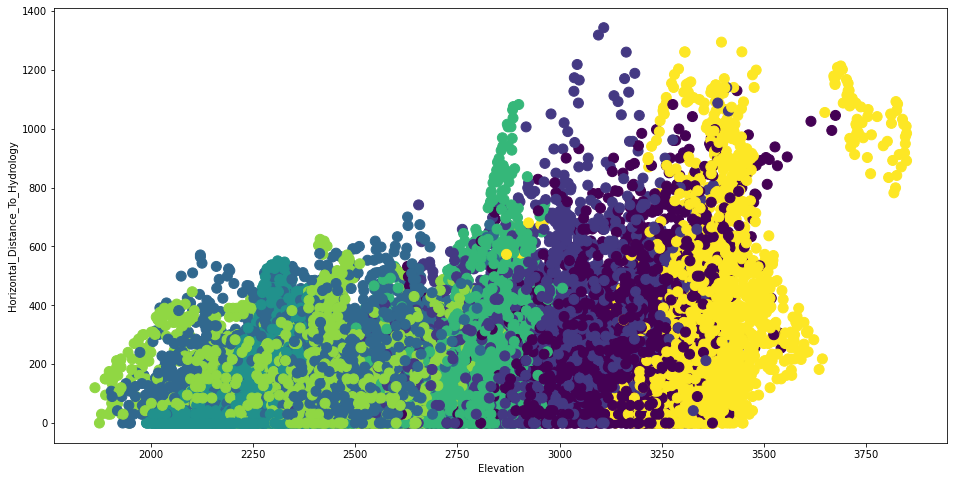

In [9]:
plota(train.Elevation, train.Horizontal_Distance_To_Hydrology)

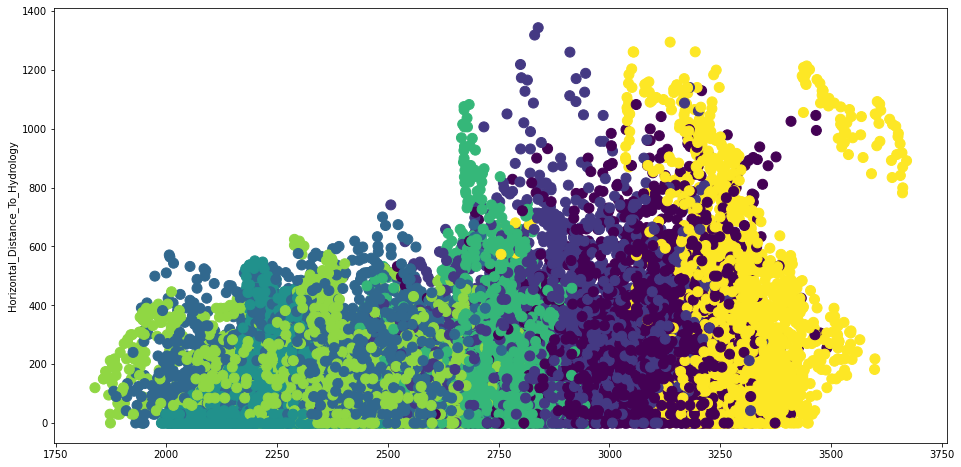

In [10]:
plota(train.Elevation - 0.2 * train.Horizontal_Distance_To_Hydrology, train.Horizontal_Distance_To_Hydrology)

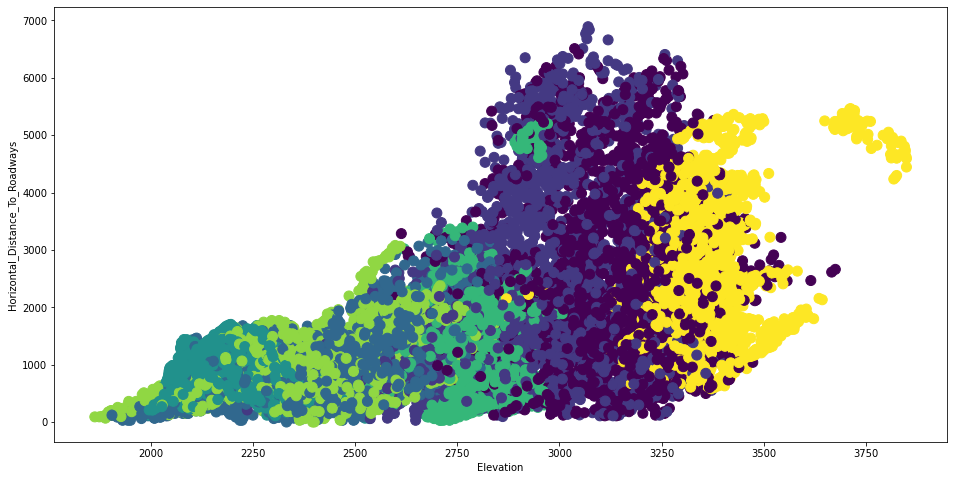

In [11]:
plota(train.Elevation, train.Horizontal_Distance_To_Roadways)

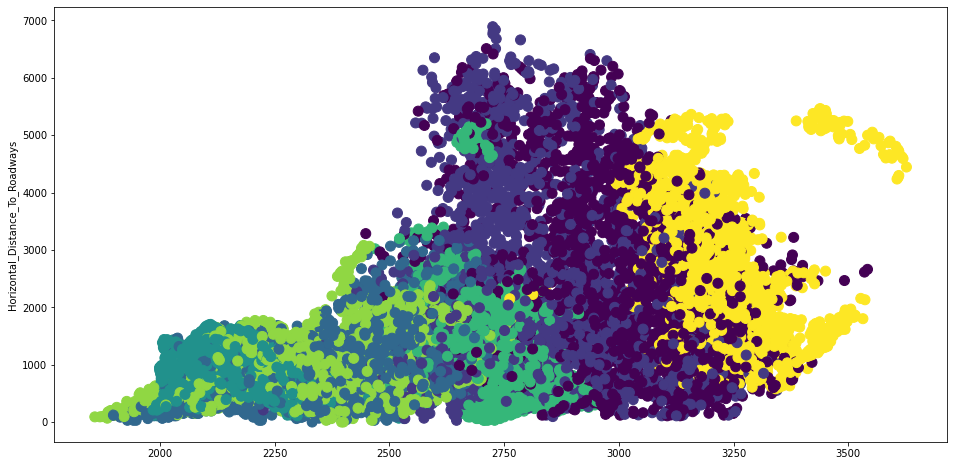

In [12]:
plota(train.Elevation - .05 * train.Horizontal_Distance_To_Roadways, train.Horizontal_Distance_To_Roadways)

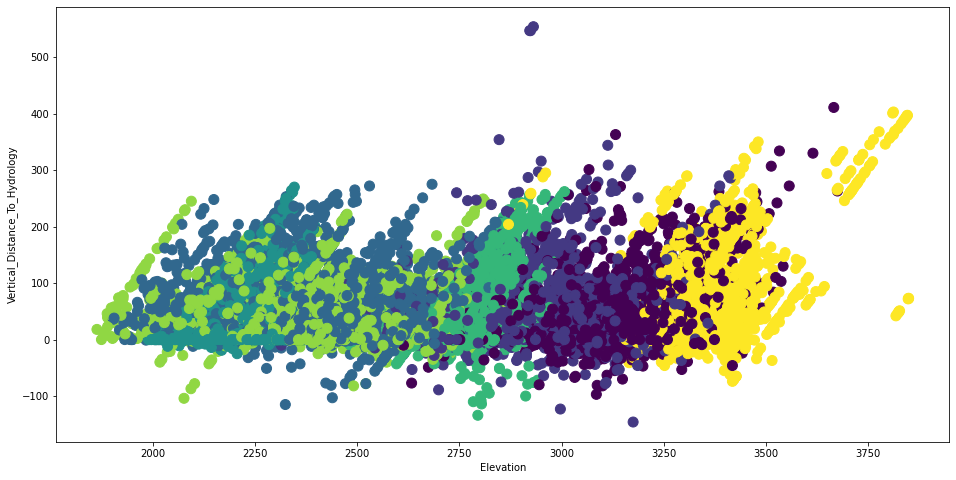

In [13]:
plota(train.Elevation, train.Vertical_Distance_To_Hydrology)

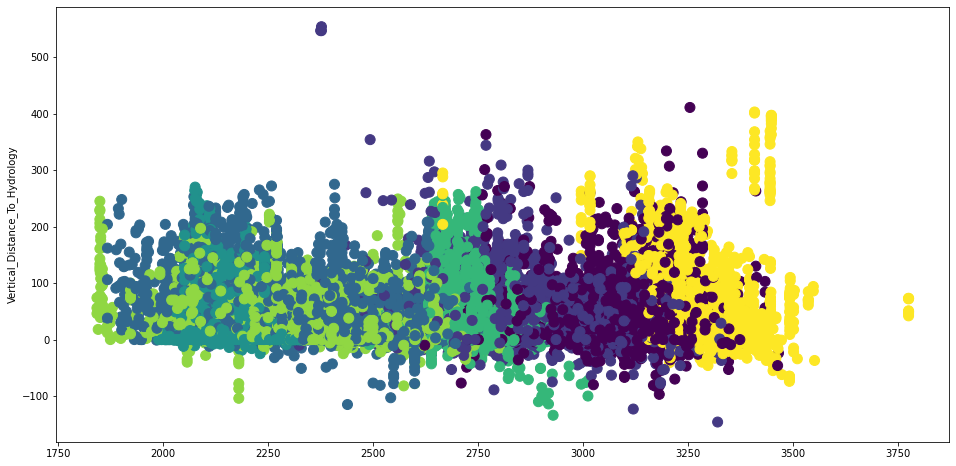

In [14]:
plota(train.Elevation - train.Vertical_Distance_To_Hydrology, train.Vertical_Distance_To_Hydrology)

- In the plots above, the different colors of the datapoints represent specific covertypes.
- We can see the how the new features have shifted the plots.
- Becuase we are utilizing tree-based models we want to create new features that help the model group values based on certain criteria for each cover type.
- We can see how the new features in the plots have changed the distribution of covertypes in a way that can hopefully aid in our tree-based models accuracy.

In [15]:
X_train['Elev_to_Horizontal_Hyd']=X_train.Elevation - 0.2 * X_train.Horizontal_Distance_To_Hydrology 
X_train['Elev_to_Horizontal_Road']=X_train.Elevation - 0.05 * X_train.Horizontal_Distance_To_Roadways  
X_train['Elev_to_Verticle_Hyd']=X_train.Elevation - X_train.Vertical_Distance_To_Hydrology 

X_train['Mean_Horizontal_Dist']=(X_train.Horizontal_Distance_To_Fire_Points + X_train.Horizontal_Distance_To_Hydrology + 
                                 X_train.Horizontal_Distance_To_Roadways)/3 
X_train['Mean_Fire_Hydro']=(X_train.Horizontal_Distance_To_Fire_Points + X_train.Horizontal_Distance_To_Hydrology)/2

In [16]:
X_train.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Elev_to_Horizontal_Hyd,Elev_to_Horizontal_Road,Elev_to_Verticle_Hyd,Mean_Horizontal_Dist,Mean_Fire_Hydro
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,5,2544.4,2570.50,2596,2349.000000,3268.5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,5,2547.6,2570.50,2596,2275.666667,3218.5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,2,2750.4,2645.00,2739,3189.666667,3194.5
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,2,2736.6,2630.50,2667,3181.000000,3226.5
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,5,2564.4,2575.45,2596,2238.666667,3162.5
